In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import random
from layeris.layer_image import LayerImage
from scipy.ndimage import gaussian_filter
from scipy.signal import windows

img_real = Image.open('nirita_as_sample_small.jpg')
img_real = np.array(img_real)
img_invert = Image.open('nirita_as_invert_small.jpg')
img_invert = np.array(img_invert)
blue_ref = Image.open('blue_reference_4.jpg')
blue_ref = np.array(blue_ref)
hair_filt = Image.open('nirita_hair_filter.bmp')
hair_filt = 1-np.array(hair_filt)

In [2]:
img_recon = np.zeros(img_real.shape)

[dim_1, dim_2, _] = img_recon.shape

origin_copy = blue_ref.astype('float')
white_idx = [[np.all(i>[220,220,220]) for i in row] for row in origin_copy]
origin_copy[white_idx] = np.nan
black_idx = [[np.all(i<[100,100,100]) for i in row] for row in origin_copy]
origin_copy[black_idx] = np.nan

for n in range(dim_1):
    for k in range(dim_2):
        if hair_filt[n,k]:
            colour = img_real[n,k]
            dist = np.linalg.norm(origin_copy - colour, axis=2)
            #dist = np.abs(origin_copy - colour)
            idx = np.asarray(np.where(dist==np.nanmin(dist))).T
            img_recon[n,k] = blue_ref[idx[0][0], idx[0][1]]
        else:
            img_recon[n,k] = img_real[n,k,:]

for i in range(img_recon.shape[2]):
    img_recon[:,:,i] = gaussian_filter(img_recon[:,:,i], sigma=0.15)

img_recon = img_recon.astype('uint8')
image_recon = LayerImage.from_array(img_recon/255)
image_now = image_recon.pin_light(img_real/255, opacity=1)
img_now = image_now.get_image_as_array()*255
img_now = img_now.astype('uint8')
#img_now = img_recon - img_real

#for i in range(img_now.shape[2]):
#    img_now[:,:,i] = img_real[:,:,i] + img_now[:,:,i]*hair_filt

Text(0.5, 1.0, 'Real color')

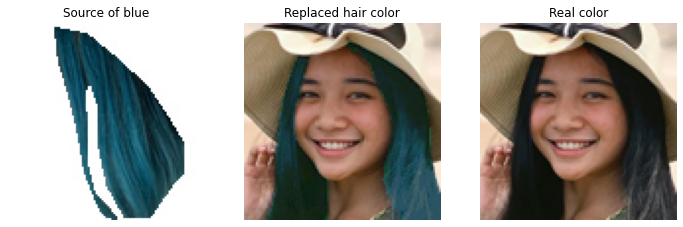

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5), dpi=72, facecolor='white')

axes[0].imshow(blue_ref)
axes[0].axis('off')
axes[0].set_title('Source of blue')

axes[1].imshow(img_now)
axes[1].axis('off')
axes[1].set_title('Replaced hair color')

axes[2].imshow(img_real)
axes[2].axis('off')
axes[2].set_title('Real color')

In [39]:
#HSV

lightness_gauss = windows.gaussian(1001, std=300)

img_real_hsv = colors.rgb_to_hsv(img_real/255)
img_real_hsv[:,:,0] = (img_real_hsv[:,:,0]+(200/360))
img_real_hsv[:,:,0] = img_real_hsv[:,:,0] - np.floor(img_real_hsv[:,:,0])
img_real_hsv[:,:,1] = img_real_hsv[:,:,1]+0.5
img_real_hsv[:,:,1] = img_real_hsv[:,:,1] - np.floor(img_real_hsv[:,:,1])
idx_lightness = np.rint(img_real_hsv[:,:,2]*1000).astype(int)
img_real_hsv[:,:,2] = img_real_hsv[:,:,2]+lightness_gauss[idx_lightness]
img_real_hsv[:,:,2] = img_real_hsv[:,:,2] - np.floor(img_real_hsv[:,:,2])
img_recon2 = colors.hsv_to_rgb(img_real_hsv)
img_recon2 = img_recon2*255
img_recon2 = img_recon2.astype('uint8')
for i in range(img_recon2.shape[2]):
    img_recon2[:,:,i] = img_real[:,:,i] + img_recon2[:,:,i]*hair_filt

Text(0.5, 1.0, 'Replaced hair color')

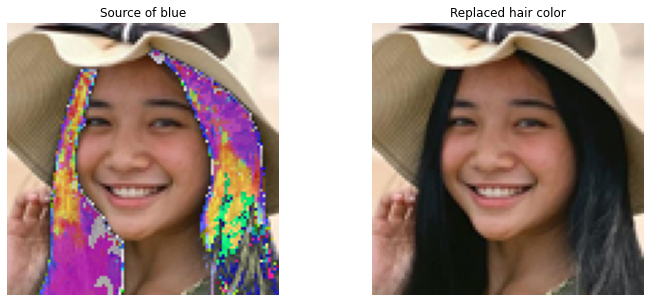

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=72, facecolor='white')

axes[0].imshow(img_recon2)
axes[0].axis('off')
axes[0].set_title('Source of blue')

axes[1].imshow(img_real)
axes[1].axis('off')
axes[1].set_title('Replaced hair color')

In [29]:
lightness_gauss = windows.gaussian(1001, std=200)

In [30]:
print(lightness_gauss[600])

0.8824969025845955
